In [1]:
import openpyxl
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

from matplotlib import pyplot as plt
import datetime
import math
import pandas as pd
from scipy import stats
import seaborn as sn

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

In [6]:
# Get the fully compiled data
egg_1_compiled = pd.read_pickle('egg_data_weekly/egg_1_compiled.pkl')
egg_2_compiled = pd.read_pickle('egg_data_weekly/egg_2_compiled.pkl')
egg_4_compiled = pd.read_pickle('egg_data_weekly/egg_4_compiled.pkl')

In [9]:
# All the data for the 1st 2 WEEKS
egg_1 = egg_1_compiled.drop(egg_1_compiled[egg_1_compiled.index > '2020-05-25 15:00:00'].index)
egg_2 = egg_2_compiled.drop(egg_2_compiled[egg_2_compiled.index > '2020-05-25 15:00:00'].index)
egg_4 = egg_4_compiled.drop(egg_4_compiled[egg_4_compiled.index > '2020-05-25 15:00:00'].index)

In [31]:
df3 = pd.concat((egg_1, egg_2, egg_4))
egg_cluster = df3.groupby(df3.index).mean()
egg_cluster = egg_cluster.drop(columns=['Unnamed: 14', 'Unnamed: 15'])
egg_cluster

,Temperature[degC],Humidity[percent],PM1.0[ug/m^3],PM2.5[ug/m^3],PM10.0[ug/m^3],O3[ppb],O3[V],NO2[ppb],NO2[V],Pressure[Pa]
Timestamp,,,,,,,,,,
2020-05-06 13:00:00,19.990000,22.908889,1.555556,2.222222,2.333333,142.283333,1.422313,2573.472222,1.405332,99264.800000
2020-05-06 14:00:00,18.079124,24.662431,5.363942,6.640385,7.081677,58.415422,1.423892,354.630470,1.420346,99265.046635
2020-05-06 15:00:00,22.104889,19.616056,1.189444,1.930556,2.090000,52.154389,1.424351,158.829056,1.421864,99188.698889
2020-05-06 16:00:00,21.898333,19.096778,1.161667,1.975000,2.187778,52.662000,1.424325,135.239611,1.422013,99140.480000
2020-05-06 17:00:00,21.836278,18.678667,1.469444,2.380556,2.604444,53.213833,1.424310,118.911944,1.422118,99111.335556
...,...,...,...,...,...,...,...,...,...,...
2020-05-25 11:00:00,39.924556,30.432944,5.115000,6.662778,6.872778,73.049333,1.425910,121.291000,1.423404,99705.132778
2020-05-25 12:00:00,39.951111,30.081556,6.773333,8.543889,8.806111,78.604889,1.425797,136.821444,1.423287,99701.504444
2020-05-25 13:00:00,37.129333,35.702833,10.958889,14.503889,14.927222,81.051278,1.425383,124.142611,1.423120,99690.339444


In [32]:
reference = pd.read_pickle('egg_data_weekly/airpointer_07Jun2020.pkl')
reference = reference.drop(reference[reference.index > '2020-05-25 15:00:00'].index)
reference

,NO,NO2,NOx,O3,PM10_conc,PM10-2.5_conc,PM2.5_conc,Air_Temperature,Relative_Humidity
Timestamp,,,,,,,,,
2020-05-06 13:00:00,1.405500,3.092333,4.498500,39.439667,14.807833,10.762833,4.045167,12.164500,29.069333
2020-05-06 14:00:00,1.235167,2.711000,3.915167,40.489167,12.815500,8.869667,3.944333,12.281333,28.194667
2020-05-06 15:00:00,1.483333,3.901500,5.595000,40.472333,15.562333,11.270000,4.290667,12.369500,27.624167
2020-05-06 16:00:00,1.919000,5.137333,6.889833,40.594000,19.666000,15.035500,4.626500,12.851333,26.497000
2020-05-06 17:00:00,2.494167,7.393667,9.502500,39.201833,21.422167,16.256500,5.165667,12.170000,27.646167
...,...,...,...,...,...,...,...,...,...
2020-05-25 11:00:00,0.365917,2.609533,2.975500,55.903200,19.268467,12.141783,7.127267,996.547950,30.645433
2020-05-25 12:00:00,0.603183,6.032083,6.635250,56.402150,25.994967,14.871600,11.122967,996.351517,28.949983
2020-05-25 13:00:00,0.628783,5.811367,6.428683,63.794417,30.028817,18.580050,11.447000,996.178783,28.876100


In [41]:
egg_cluster['Airpointer_NO[ppb]'] = reference['NO']
egg_cluster['Airpointer_NO2[ppb]'] = reference['NO2']
egg_cluster['Airpointer_NOx[ppb]'] = reference['NOx']
egg_cluster['Airpointer_O3[ppb]'] = reference['O3']
egg_cluster['Airpointer_PM10_conc[ppb]'] = reference['PM10_conc']
egg_cluster['Airpointer_PM10-2.5_conc[ppb]'] = reference['PM10-2.5_conc']
egg_cluster['Airpointer_PM2.5_conc[ppb]'] = reference['PM2.5_conc']
egg_cluster['Airpointer_Air_Temperature[degC]'] = reference['Air_Temperature']
egg_cluster['Airpointer_Relative_Humidity[percent]'] = reference['Relative_Humidity']

In [43]:
egg_cluster_new = egg_cluster.drop(egg_cluster[egg_cluster['Airpointer_NO2[ppb]'] < -1].index)

In [44]:
egg_cluster_new

,Temperature[degC],Humidity[percent],PM1.0[ug/m^3],PM2.5[ug/m^3],PM10.0[ug/m^3],O3[ppb],O3[V],NO2[ppb],NO2[V],Pressure[Pa],Airpointer_NO[ppb],Airpointer_NO2[ppb],Airpointer_NOx[ppb],Airpointer_O3[ppb],Airpointer_PM10_conc[ppb],Airpointer_PM10-2.5_conc[ppb],Airpointer_PM2.5_conc[ppb],Airpointer_Air_Temperature[degC],Airpointer_Relative_Humidity[percent]
Timestamp,,,,,,,,,,,,,,,,,,,
2020-05-06 13:00:00,19.990000,22.908889,1.555556,2.222222,2.333333,142.283333,1.422313,2573.472222,1.405332,99264.800000,1.405500,3.092333,4.498500,39.439667,14.807833,10.762833,4.045167,12.164500,29.069333
2020-05-06 14:00:00,18.079124,24.662431,5.363942,6.640385,7.081677,58.415422,1.423892,354.630470,1.420346,99265.046635,1.235167,2.711000,3.915167,40.489167,12.815500,8.869667,3.944333,12.281333,28.194667
2020-05-06 15:00:00,22.104889,19.616056,1.189444,1.930556,2.090000,52.154389,1.424351,158.829056,1.421864,99188.698889,1.483333,3.901500,5.595000,40.472333,15.562333,11.270000,4.290667,12.369500,27.624167
2020-05-06 16:00:00,21.898333,19.096778,1.161667,1.975000,2.187778,52.662000,1.424325,135.239611,1.422013,99140.480000,1.919000,5.137333,6.889833,40.594000,19.666000,15.035500,4.626500,12.851333,26.497000
2020-05-06 17:00:00,21.836278,18.678667,1.469444,2.380556,2.604444,53.213833,1.424310,118.911944,1.422118,99111.335556,2.494167,7.393667,9.502500,39.201833,21.422167,16.256500,5.165667,12.170000,27.646167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-25 11:00:00,39.924556,30.432944,5.115000,6.662778,6.872778,73.049333,1.425910,121.291000,1.423404,99705.132778,0.365917,2.609533,2.975500,55.903200,19.268467,12.141783,7.127267,996.547950,30.645433
2020-05-25 12:00:00,39.951111,30.081556,6.773333,8.543889,8.806111,78.604889,1.425797,136.821444,1.423287,99701.504444,0.603183,6.032083,6.635250,56.402150,25.994967,14.871600,11.122967,996.351517,28.949983
2020-05-25 13:00:00,37.129333,35.702833,10.958889,14.503889,14.927222,81.051278,1.425383,124.142611,1.423120,99690.339444,0.628783,5.811367,6.428683,63.794417,30.028817,18.580050,11.447000,996.178783,28.876100


In [45]:
# Drop the first two outliers
egg_cluster_new = egg_cluster_new.iloc[3:]

In [46]:
egg_cluster_new

,Temperature[degC],Humidity[percent],PM1.0[ug/m^3],PM2.5[ug/m^3],PM10.0[ug/m^3],O3[ppb],O3[V],NO2[ppb],NO2[V],Pressure[Pa],Airpointer_NO[ppb],Airpointer_NO2[ppb],Airpointer_NOx[ppb],Airpointer_O3[ppb],Airpointer_PM10_conc[ppb],Airpointer_PM10-2.5_conc[ppb],Airpointer_PM2.5_conc[ppb],Airpointer_Air_Temperature[degC],Airpointer_Relative_Humidity[percent]
Timestamp,,,,,,,,,,,,,,,,,,,
2020-05-06 16:00:00,21.898333,19.096778,1.161667,1.975000,2.187778,52.662000,1.424325,135.239611,1.422013,99140.480000,1.919000,5.137333,6.889833,40.594000,19.666000,15.035500,4.626500,12.851333,26.497000
2020-05-06 17:00:00,21.836278,18.678667,1.469444,2.380556,2.604444,53.213833,1.424310,118.911944,1.422118,99111.335556,2.494167,7.393667,9.502500,39.201833,21.422167,16.256500,5.165667,12.170000,27.646167
2020-05-06 18:00:00,18.713167,20.979889,1.914444,2.970556,3.246667,53.447722,1.424056,98.456389,1.422115,99124.504444,1.459167,10.763833,12.104500,35.107333,16.479000,11.466000,5.013333,11.409000,28.912333
2020-05-06 19:00:00,15.544500,24.716389,2.207222,3.381667,3.666111,53.151778,1.423809,91.426611,1.422016,99156.430556,0.409500,3.808167,4.204333,38.284333,13.103500,9.678500,3.426167,10.577667,26.920333
2020-05-06 20:00:00,14.085389,23.612889,1.320000,1.861111,1.991111,49.789500,1.423761,74.300333,1.422064,99214.601111,0.315500,4.448667,4.764667,36.122500,10.409333,7.162833,3.244000,9.082000,28.326833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-25 11:00:00,39.924556,30.432944,5.115000,6.662778,6.872778,73.049333,1.425910,121.291000,1.423404,99705.132778,0.365917,2.609533,2.975500,55.903200,19.268467,12.141783,7.127267,996.547950,30.645433
2020-05-25 12:00:00,39.951111,30.081556,6.773333,8.543889,8.806111,78.604889,1.425797,136.821444,1.423287,99701.504444,0.603183,6.032083,6.635250,56.402150,25.994967,14.871600,11.122967,996.351517,28.949983
2020-05-25 13:00:00,37.129333,35.702833,10.958889,14.503889,14.927222,81.051278,1.425383,124.142611,1.423120,99690.339444,0.628783,5.811367,6.428683,63.794417,30.028817,18.580050,11.447000,996.178783,28.876100


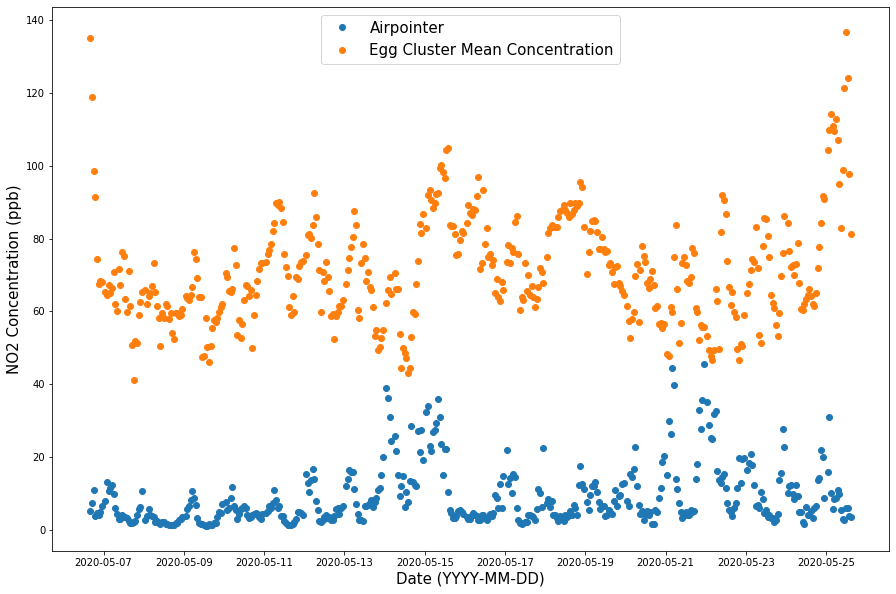

In [47]:
# Plot the time series graph
plt.figure(figsize=(15,10))
plt.plot(egg_cluster_new.index.to_series(), egg_cluster_new['Airpointer_NO2[ppb]'], 'o', label='Airpointer')
plt.plot(egg_cluster_new.index.to_series(), egg_cluster_new['NO2[ppb]'], 'o',label="Egg Cluster Mean Concentration")
plt.xlabel('Date (YYYY-MM-DD)', fontsize=15)
plt.ylabel('NO2 Concentration (ppb)', fontsize=15)
plt.legend(loc='best', fontsize=15)

0.0021514312166528438

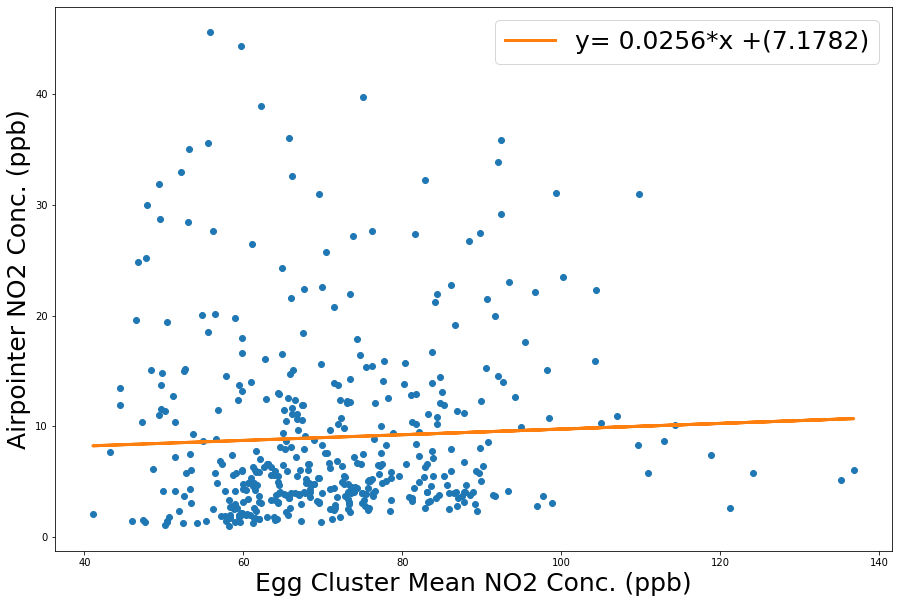

In [49]:
# Calculate a regression line
xValues = egg_cluster_new['NO2[ppb]'].to_numpy()
yValues = egg_cluster_new['Airpointer_NO2[ppb]'].to_numpy()
# Calculate a regression line
linear_regression = LinearRegression().fit(xValues.reshape(-1,1), yValues)
# Plot the values graph with the regression line
plt.figure(figsize=(15,10))
plt.plot(xValues, yValues, 'o')
plt.plot(xValues, 
         linear_regression.predict(xValues.reshape(-1,1)),
         label='y= {:0.4f}*x +({:0.4f})'.format(linear_regression.coef_[0], linear_regression.intercept_),
         linewidth=3)
plt.xlabel('Egg Cluster Mean NO2 Conc. (ppb)', fontsize=25)
plt.ylabel('Airpointer NO2 Conc. (ppb)', fontsize=25)
plt.legend(loc='best', fontsize=25)

# Calculate the R2 score
metrics.r2_score(yValues, linear_regression.predict(xValues.reshape(-1,1)))